In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import pandas as pd


from pylab import cm
from matplotlib.colors import LogNorm

from mockobservation_tools.galaxy_tools import load_sim_FIREBox, get_mock_observation

Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


In [2]:
%matplotlib inline

In [3]:
gal_params = pd.read_csv('/export/nfs0home/kleinca/FIREBox_MockImage/data/FIREBox_Galaxy_Params.csv')

In [4]:
# Look at galaxies that are centrals that at Mstar>10^9

mask = (gal_params['object_Mstar'] > 9) & (gal_params['object_groupID'] < 0) & (gal_params['object_Mstar'] < 10)

gal_sample = gal_params[mask].reset_index(drop=True)

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.3516675  0.18978075 0.13771647]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.16834498525580358
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:129: RuntimeWarning: divide by zero encountered in log10
  f_i = np.log10(i/minnorm) / np.log10(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:137: RuntimeWarning: divide by zero encountered in log
  r = np.log(r/minnorm) / np.log(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:138: RuntimeWarning: divide by zero encountered in log
  g = np.log(g/minnorm) / np.log(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:139: RuntimeWarning: divide by zero encountered in log
  b = np.log(b/minnorm) / np.log(maxnorm/minnorm);


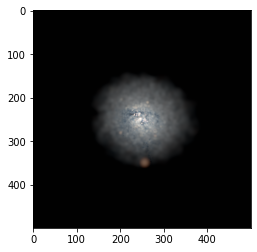

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [1.28330579 0.7114718  0.51588585]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.5816787061609118
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


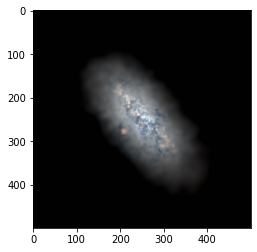

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.74685453 0.49593294 0.42210689]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.789852560818838
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


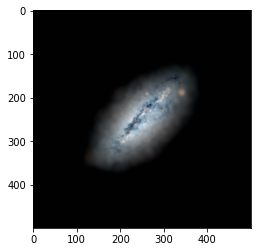

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.95133654 0.62022511 0.51077276]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.8030878206943242
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


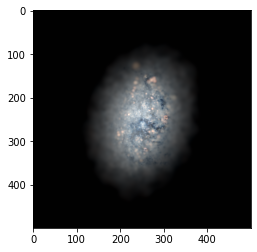

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.74562481 0.45123982 0.34301357]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.3935935182750044
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


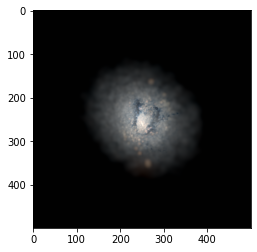

In [5]:
for object_id in  gal_sample['object_id'][:5]:
    obj_path = '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_'+ str(object_id) +'.hdf5'
    
    star_snapdict, gas_snapdict = load_sim_FIREBox(obj_path)
    mock_image, band_image_u, band_image_g, band_image_r = get_mock_observation(star_snapdict, gas_snapdict)
    
    plt.imshow(mock_image)
    plt.show()

    

In [5]:
obj_path = '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_'+ str(gal_sample['object_id'][5]) +'.hdf5'


star_snapdict, gas_snapdict = load_sim_FIREBox(obj_path)

In [6]:
gas_snapdict

{'h': 0.6774,
 'a': 1.0,
 'Rvir': 112.35606731620904,
 'Mvir': 7.791172128727488e+20,
 'Coordinates': array([[ 10.36083356,  29.33428168,  88.23611405],
        [  2.82882666,  29.96483351,  96.58733834],
        [ -7.43725812,  25.83357226, 102.42832855],
        ...,
        [-81.71278682,  28.35293293,  94.45794868],
        [-95.95384346,  28.0978389 ,  93.80235089],
        [-97.25108351,  16.63202936,  89.87307645]]),
 'Velocities': array([[ 68.47888947,  44.20455933, -33.59163666],
        [ 94.57281494,  36.61334229, -12.43710327],
        [ 85.2806015 ,  57.58545303,   2.75693464],
        ...,
        [ 50.80645752,  20.43671227,  31.12150383],
        [ 45.18903732,   8.15756512,  65.53843689],
        [ 55.0595665 ,   4.77834034,  24.45985413]]),
 'Masses': array([136384.19501777,  62583.35888034,  76548.9225791 , ...,
         62779.01302179,  63064.93860739,  63572.87407846]),
 'Metallicity': array([0.03350922, 0.00510149, 0.02058714, ..., 0.0024105 , 0.00244455,
        

In [62]:
mock_image, band_image_u, band_image_g, band_image_r = get_mock_observation(star_snapdict, gas_snapdict)

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.41750708 0.29889561 0.25431326]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.34397888031185153
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


In [67]:
FOV = 10

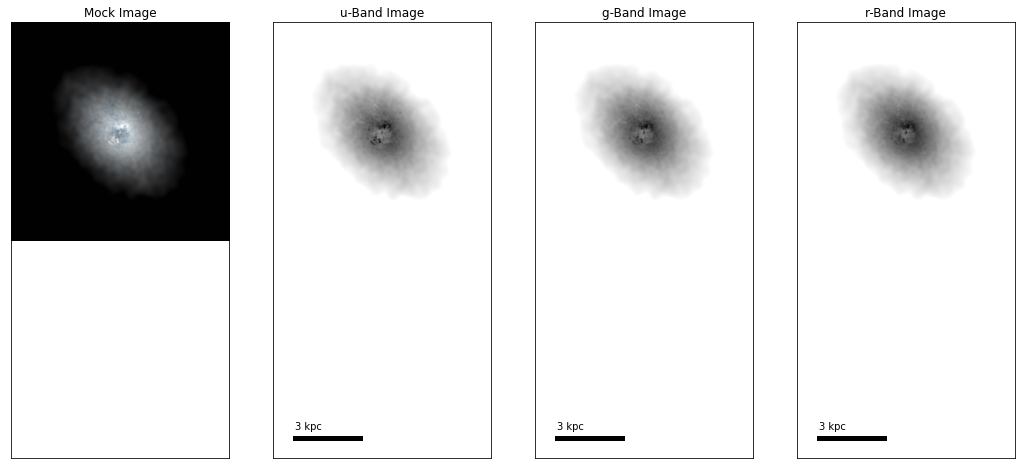

In [70]:
fig = plt.figure(figsize = (18, 15))

#scale bar set up
scale_kpc = FOV / 3
scale_kpc = int(scale_kpc)
pixel_bar = scale_kpc * 500 / FOV 
pixel_bar = int(pixel_bar)

ax = fig.add_subplot(1, 4, 1)
plt.imshow(mock_image)
ax.set_title('Mock Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='white', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='white')


ax = fig.add_subplot(1, 4, 2)
im = ax.imshow(band_image_u, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('u-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


ax = fig.add_subplot(1, 4, 3)
im = ax.imshow(band_image_g, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('g-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


ax = fig.add_subplot(1, 4, 4)
im = ax.imshow(band_image_r, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('r-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50, 50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


plt.show()